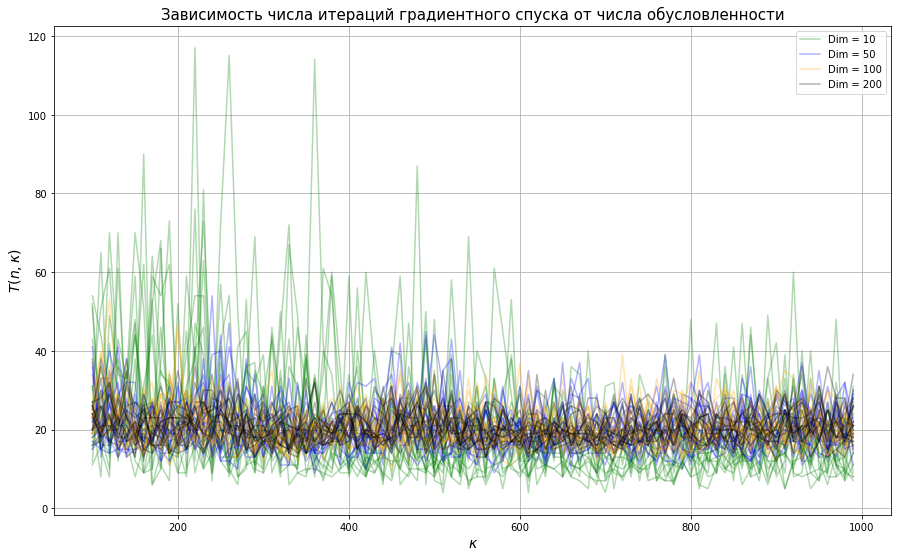

In [2]:
import numpy as np
import scipy

from matplotlib import pyplot as plt
from datetime import datetime

import optimization
import oracles
from plot_trajectory_2d import plot_levels, plot_trajectory

np.random.seed(42)

N = np.array([10, 50, 100, 200])
Colors = ['green', 'blue', 'orange', 'black']
Kappa = np.arange(100, 1000, 10)


plt.figure(figsize=(15, 9))
plt.title("Зависимость числа итераций градиентного спуска от числа обусловленности", size=15)
plt.xlabel(r'$\kappa$', size=14)
plt.ylabel(r'$T(n, \kappa)$', size=14)
plt.grid(alpha=1)

for n, col in zip(N, Colors):
    for exp in range(15):
        T = np.zeros_like(Kappa)
        for i, kap in enumerate(Kappa):
            A = scipy.sparse.diags(
                np.concatenate((np.random.uniform(1, kap, n - 2), np.array([1, kap])), axis=0), 0)
            b = np.random.uniform(-kap, kap, n)
            quad = oracles.QuadraticOracle(A, b)
            unused_x, unused_msg, history = optimization.gradient_descent(
                quad, np.random.uniform(-kap, kap, n), trace=True)
            T[i] = len(history['grad_norm'])
        plt.plot(Kappa, T, color=col, alpha=0.3, label = "Dim = {}".format(n) if exp == 0 else None)

plt.legend()
plt.savefig("pictures/exp_2.png")
    